# Image segmentation using mask-rcnn costum model with tensorflow 2


## **author: koussaila kadi**

## 1. Git Clone and set tensorflow backend version to 2.x

In [3]:
"""

Méthode 1: ----------------------------------------------

# clone Mask-RCNN from Github: 
! git clone https://github.com/Koussailakadi/Mask_RCNN.git 
! cd Mask_RCNN
! python -m pip install --upgrade pip
! pip install -r requirements.txt

Méthode 2: ----------------------------------------------
create vertual environnement for python: 
! git clone https://github.com/Koussailakadi/Mask_RCNN.git 
! mkdir env
! cd env
! python -m venv .
! pip install -r ../Mask_RCNN/requirements.txt

your environnement is setup. 
"""
%matplotlib inline

In [4]:
import os
import sys

sys.path.append("/content/Mask_RCNN/")
print(os.getcwd())
print(os.listdir(os.getcwd()))
from mrcnn import*
from mrcnn.m_rcnn import*

c:\Users\HP\Desktop\Mask_RCNN
['.git', '.gitignore', '.vscode', 'annotations_coco.json', 'dataset', 'env', 'img', 'Inference_Demo_Mask_RCNN.ipynb', 'inference_MaskRCNN.py', 'logs', 'mask_rcnn_coco.h5', 'mrcnn', 'README.md', 'requirements.txt', 'test', 'Train_Demo_MaskRCNN_Cracks_Segmentation.ipynb', 'with_cracks.zip']


## **2. Image Dataset**

Load your annotated dataset


In [15]:
# Extract Images
images_path = "with_cracks.zip"
annotations_path = "annotations_coco.json"

extract_images(images_path, "/dataset")

Extracted: 687 images


In [16]:
dataset_train = load_image_dataset( annotations_path, "dataset", "train")
dataset_val = load_image_dataset( annotations_path, "dataset", "val")
dataset_test = load_image_dataset(annotations_path, "dataset", "test")
class_number = dataset_train.count_classes()
print('All images :',len(dataset_train.image_ids)+len(dataset_val.image_ids)+len(dataset_test.image_ids))
print('Train:',len(dataset_train.image_ids))
print('Validation:',len(dataset_val.image_ids))
print('test: ',len(dataset_test.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  annotations_coco.json
Annotation json path:  annotations_coco.json
Annotation json path:  annotations_coco.json
All images : 687
Train: 602
Validation: 43
test:  42
Classes: 2


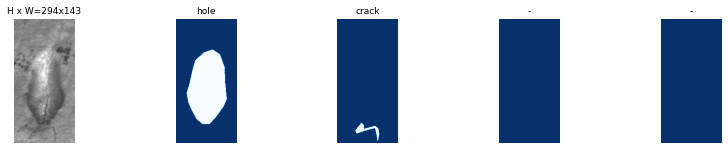

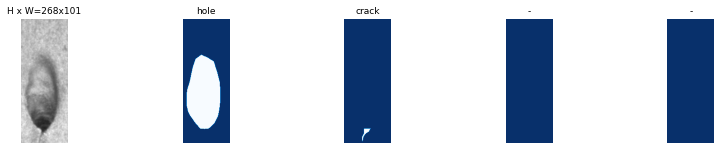

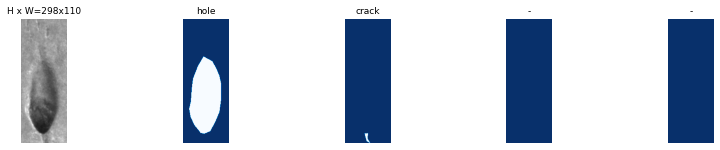

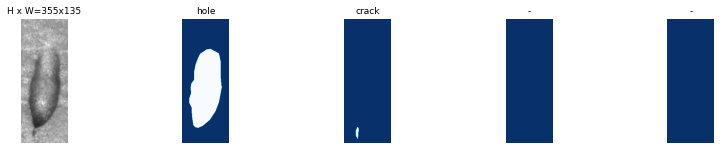

In [17]:
# Load image samples
display_image_samples(dataset_train)

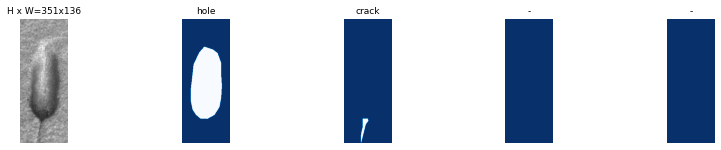

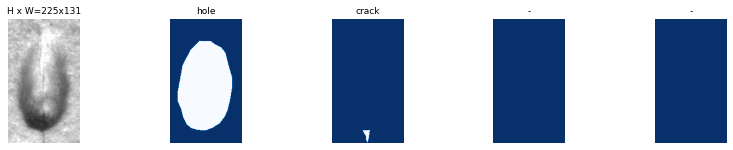

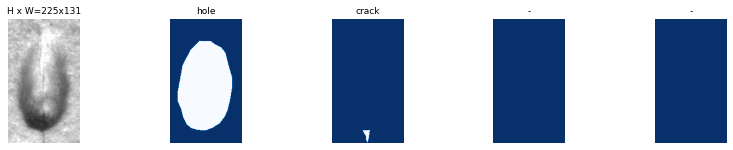

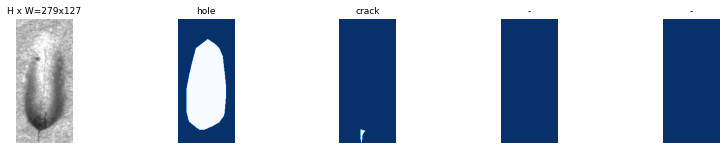

In [18]:
# Load image samples
display_image_samples(dataset_val)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [21]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 2  # Background + Car and truck

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 300 
    VALIDATION_STEPS = 20

    # Images size:  
    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 384

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    # learning rate
    LEARNING_RATE = 0.001

    

# Load Configuration
config = CustomConfig()
config.display()
model = load_training_model(config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

TypeError: Could not build a TypeSpec for <KerasTensor: shape=(None, None, 4) dtype=float32 (created by layer 'tf.math.truediv_4')> with type KerasTensor

In [8]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_val, config)

NameError: name 'model' is not defined

## **4. Detection (test your model on a random image)**

In [1]:
# Load Test Model
# The latest trained model will be loaded
#test_model, inference_config = load_test_model()
#LOAD MODEL. Create model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)


# Get path to saved weightsµ
model_path = model.find_last()
print(model_path)

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

NameError: name 'modellib' is not defined

In [11]:
# Test on a random image
# test_random_image(model, dataset_val, config)

original_image           shape: (384, 384, 3)         min:    0.00000  max:  163.00000  uint8


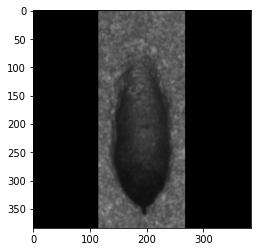

Trained model result
Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  163.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:   59.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.94527  max:    1.77817  float32


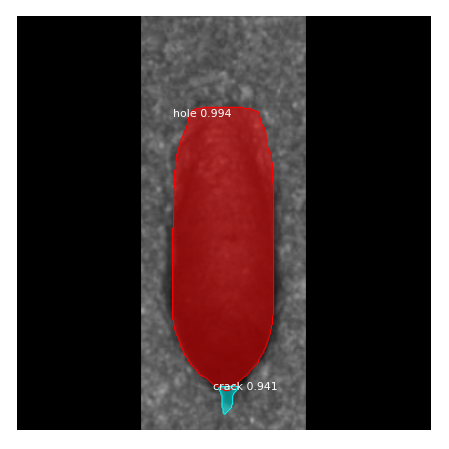

In [33]:
image_id = random.choice(dataset_test.image_ids)
#image_id=224
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
    modellib.load_image_gt(dataset_test, config,
                            image_id, use_mini_mask=False)

log("original_image", original_image)
plt.imshow(original_image)
plt.show()
# log("image_meta", image_meta)
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

# Model result
print("Trained model result")
results = model.detect([original_image], verbose=1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False)